In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-dropout/sample_submission.csv
/kaggle/input/students-dropout/validation.csv
/kaggle/input/students-dropout/train.csv
/kaggle/input/students-dropout/test.csv


### Setting up the dfs

In [127]:
# to train:
train_df = pd.read_csv('/kaggle/input/students-dropout/train.csv')
# to test:
validation_df = pd.read_csv('/kaggle/input/students-dropout/validation.csv')
# to predict:
test_df = pd.read_csv('/kaggle/input/students-dropout/test.csv')

sample_df = pd.read_csv('/kaggle/input/students-dropout/sample_submission.csv')

train_df

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,4286,1,1,1,6,1,1,1,22,14,...,0,5,9,4,13.666667,1,10.8,1.4,1.74,Graduate
2472,4399,1,1,1,11,1,1,1,22,14,...,0,6,6,6,14.333333,0,9.4,-0.8,-3.12,Graduate
2473,3526,2,12,1,4,1,1,1,1,3,...,2,7,7,5,11.200000,0,8.9,1.4,3.51,Dropout
2474,1050,1,1,1,2,1,1,1,1,28,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Graduate


In [128]:
train_df.describe()

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,...,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,2211.848142,1.176494,6.865105,1.722940,9.912763,0.885299,2.457997,1.237480,12.121163,16.460420,...,0.125202,0.553716,6.207997,8.068255,4.466074,10.287523,0.142973,11.558522,1.227181,0.049935
std,1279.257993,0.600966,5.261983,1.304837,4.348326,0.318725,3.878489,1.685393,9.019925,11.009475,...,0.651707,1.914945,2.209427,3.972810,2.987121,5.168928,0.709357,2.653639,1.368978,2.270650
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1078.750000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.833333,0.000000,9.400000,0.300000,-1.700000
50%,2218.000000,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.221825,0.000000,11.100000,1.400000,0.320000
75%,3319.250000,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.369375,0.000000,13.900000,2.600000,1.790000
max,4420.000000,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,20.000000,28.000000,34.000000,...,12.000000,18.000000,23.000000,27.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [129]:
train_df.isnull().sum()
#train_df.dtypes

Id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Internationa

In [ ]:
### Understading the target

In [130]:
train_df['Category'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

### Defining the most impacting featres

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
#for feature in train_df.columns:
#    print(f'{feature}')
#    sns.displot(data=train_df, x=feature, hue= 'Category', kind="kde")
#    plt.show()

In [132]:
features = ['Application mode',
'Course',
'Scholarship holder',
'Curricular units 1st sem (approved)',
'Curricular units 2nd sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (grade)',

'Debtor',
'Curricular units 2nd sem (evaluations)',
'Curricular units 1st sem (evaluations)',
'Tuition fees up to date',
'Gender',
'Age at enrollment',
'Curricular units 1st sem (enrolled)',
'Curricular units 2nd sem (enrolled)',
'Unemployment rate',

'Displaced',
"Mother's qualification",
"Father's qualification",
"Father's occupation",
'Previous qualification',
'Inflation rate',
'GDP']

In [133]:
numerical = [ 'Age at enrollment',
'Unemployment rate',
'Previous qualification',
'Inflation rate',
'GDP',
'Curricular units 1st sem (approved)',
'Curricular units 2nd sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (grade)',
'Curricular units 1st sem (evaluations)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 1st sem (enrolled)',
'Curricular units 2nd sem (enrolled)']

Age at enrollment


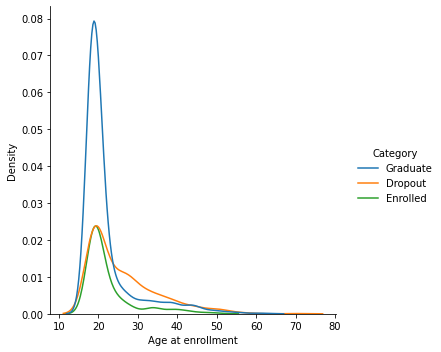

Unemployment rate


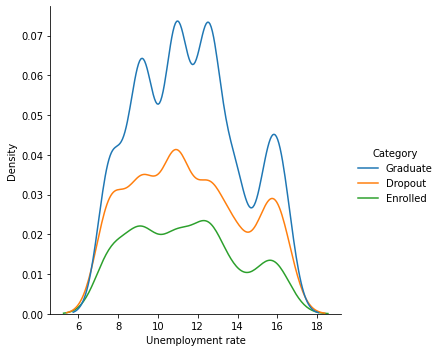

Previous qualification


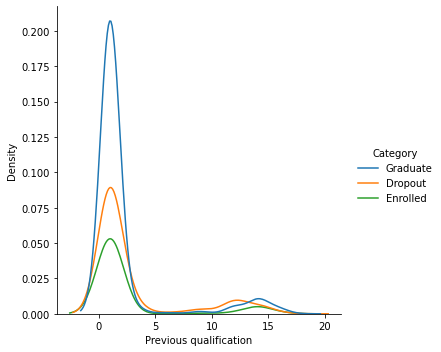

Inflation rate


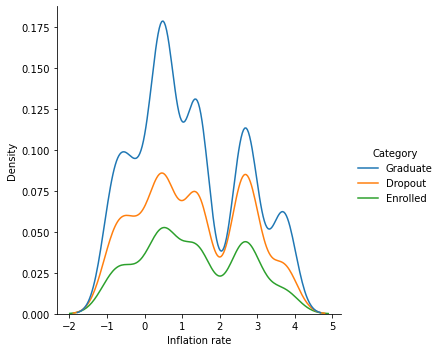

GDP


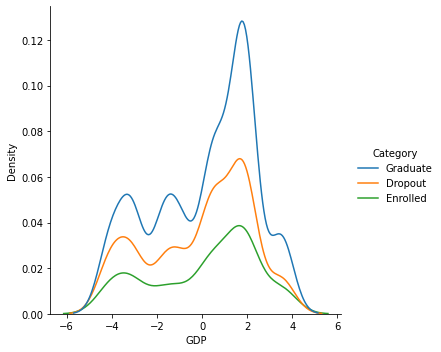

Curricular units 1st sem (approved)


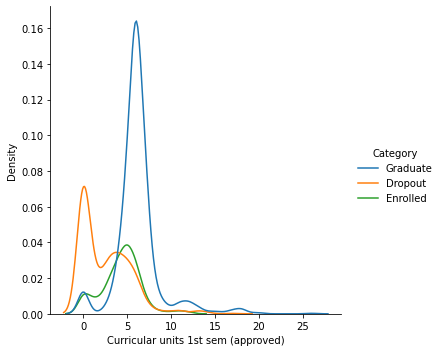

Curricular units 2nd sem (approved)


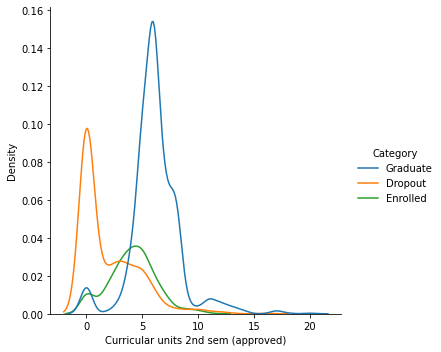

Curricular units 1st sem (grade)


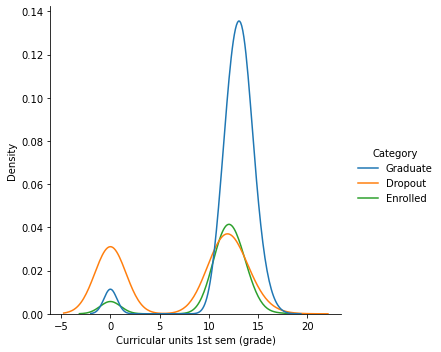

Curricular units 2nd sem (grade)


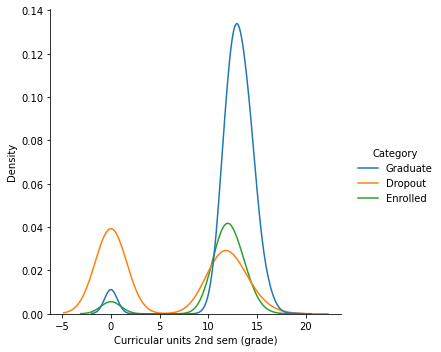

Curricular units 1st sem (evaluations)


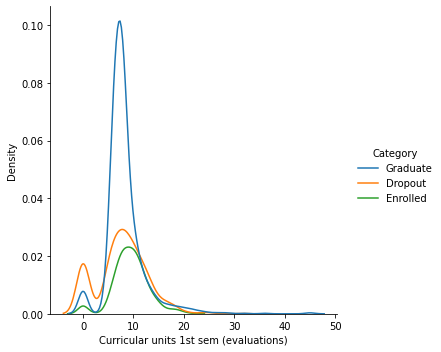

Curricular units 2nd sem (evaluations)


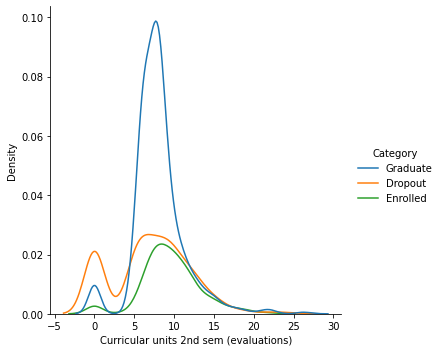

Curricular units 1st sem (enrolled)


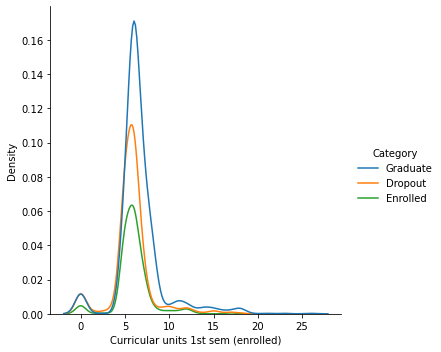

Curricular units 2nd sem (enrolled)


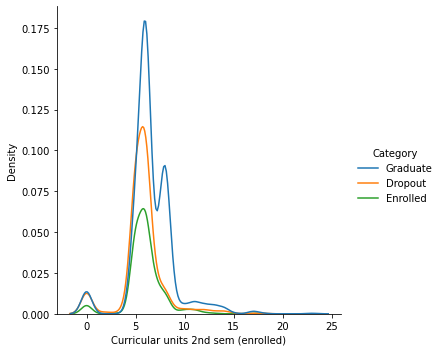

In [134]:
for feature in numerical:
    print(f'{feature}')
    sns.displot(data=train_df, x=feature, hue= 'Category', kind="kde")
    plt.show()

In [135]:
bools = ['Scholarship holder',
'Debtor',
'Tuition fees up to date',
'Gender',
'Displaced']

Scholarship holder


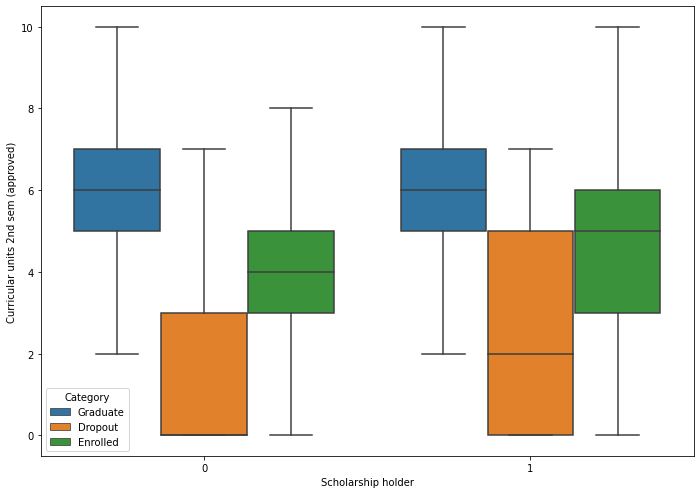

Debtor


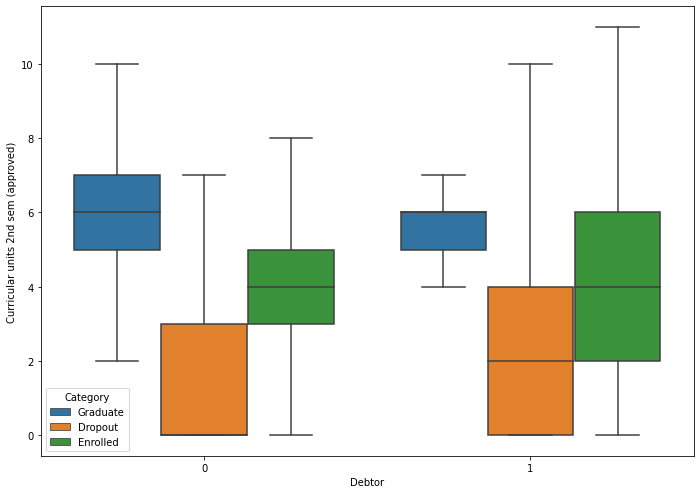

Tuition fees up to date


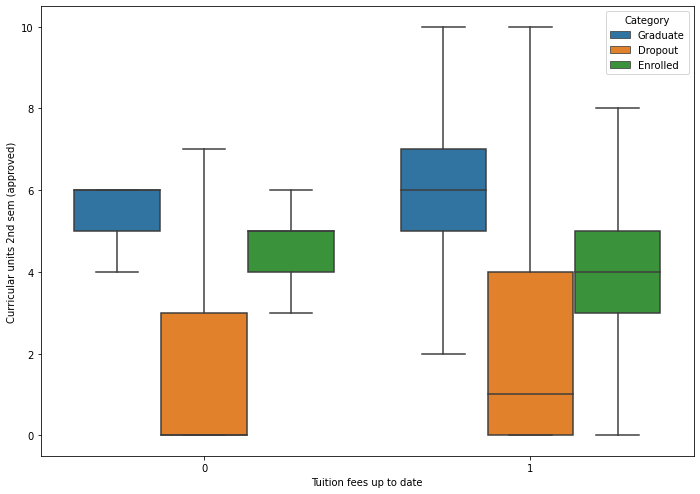

Gender


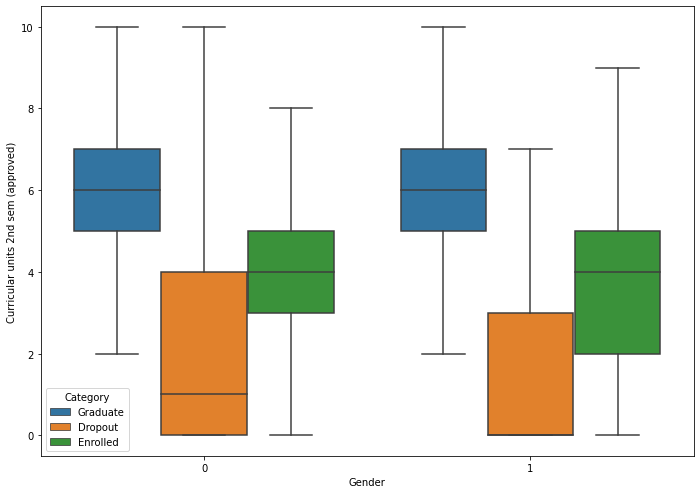

Displaced


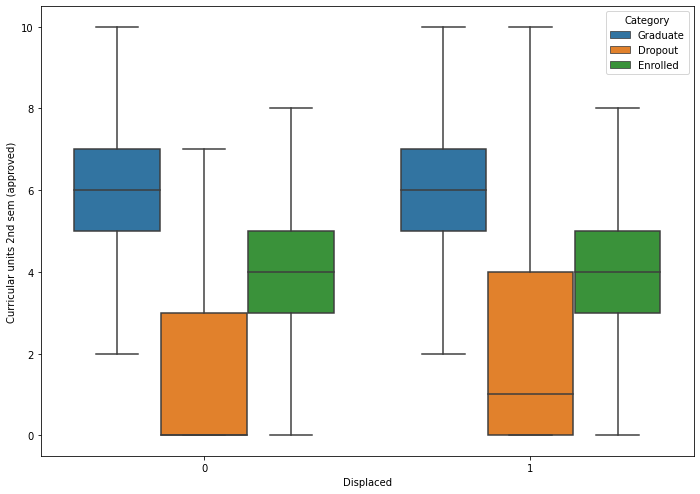

In [136]:
for feature in bools:
    print(f'{feature}')
    sns.boxplot(data=train_df, x=feature,y='Curricular units 2nd sem (approved)', hue= 'Category', showfliers=False)
    plt.show()

In [137]:
categorical = ['Application mode',
'Course',
"Mother's qualification",
"Father's qualification",
"Father's occupation"]

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27

for feature in categorical:
    print(f'{feature}')
    sns.bar(data=train_df, y=feature,x='Curricular units 2nd sem (approved)', hue= 'Category', showfliers=False, orient = 'h')
    plt.show()

### Predicting with the GradientBoostingClassifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
# to train:
train_df = pd.read_csv('/kaggle/input/students-dropout/train.csv')
# to test:
validation_df = pd.read_csv('/kaggle/input/students-dropout/validation.csv')

 
X_train =  train_df[features]
X_test = validation_df[features]
y_train = train_df['Category']
y_test = validation_df['Category']
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,max_depth= 5,
    max_features= 0.4, subsample= 1, random_state=0).fit(X_train, y_train)
gbc.score(X_test, y_test)

0.7560240963855421

In [140]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Tuning the GradientBoostingClassifier

In [141]:
"""from sklearn.model_selection import GridSearchCV
params_sgbr = {
    'subsample': [1,1.1,0.9],
    'n_estimators': [100,150, 200],
    'learning_rate':[0.9,1,2]
    #random_state=0
}
grid_sgbr = GridSearchCV(estimator = GradientBoostingClassifier(), 
                         param_grid=params_sgbr, scoring ='accuracy', 
                         cv=10, n_jobs=-1 )
grid_sgbr.fit(X_train, y_train)
print(grid_sgbr.best_params_)"""

"from sklearn.model_selection import GridSearchCV\nparams_sgbr = {\n    'subsample': [1,1.1,0.9],\n    'n_estimators': [100,150, 200],\n    'learning_rate':[0.9,1,2]\n    #random_state=0\n}\ngrid_sgbr = GridSearchCV(estimator = GradientBoostingClassifier(), \n                         param_grid=params_sgbr, scoring ='accuracy', \n                         cv=10, n_jobs=-1 )\ngrid_sgbr.fit(X_train, y_train)\nprint(grid_sgbr.best_params_)"

In [142]:
train_df['Category'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [143]:
X_target_gbc = test_df[features]
y_target_gbc = gbc.predict(X_target_gbc)
target_df = pd.DataFrame(test_df['Id'])
Category = y_target_gbc.tolist()
target_df['Category'] = Category

#target_df.to_csv('submission.csv',index=False)  

#target_df = pd.read_csv('submission.csv')
#target_df['Category'].unique()

In [144]:
df = pd.concat([train_df, validation_df])

df


,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,979,1,9,1,4,1,1,1,1,28,...,3,9,14,8,12.250000,0,15.5,2.8,-4.06,Graduate
1324,283,1,1,1,5,1,1,1,13,27,...,0,6,6,6,12.833333,0,16.2,0.3,-0.92,Graduate
1325,1298,1,1,1,17,0,1,1,2,27,...,0,5,7,5,11.800000,0,7.6,2.6,0.32,Graduate
1326,898,1,1,1,11,1,1,1,23,14,...,0,6,10,4,11.000000,0,7.6,2.6,0.32,Enrolled


In [145]:
#from sklearn.model_selection import RepeatedKFold

#rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
#for train_index, test_index in rkf.split(X):
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [146]:
y_train_xgb = y_train.replace({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0})
y_test_xgb = y_test.replace({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0})
print(y_train_xgb)

0       2
1       0
2       2
3       2
4       0
       ..
2471    2
2472    2
2473    0
2474    2
2475    0
Name: Category, Length: 2476, dtype: int64


In [147]:
#X_test = validation_df[features]
X_train_xgb = train_df.drop(columns=['Category'])
X_test_xgb = validation_df.drop(columns=['Category'])
X_train_xgb

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,3222,1,1,1,14,1,1,1,13,28,...,0,0,6,7,6,14.714286,0,11.1,0.6,2.02
1,2388,1,8,4,9,1,1,1,23,14,...,0,0,5,10,2,12.500000,0,11.1,0.6,2.02
2,1865,1,12,1,17,0,1,1,1,1,...,0,0,5,5,5,12.400000,0,15.5,2.8,-4.06
3,652,1,12,1,12,1,12,1,1,5,...,0,0,8,11,7,12.614286,0,12.7,3.7,-1.70
4,4220,1,1,1,14,1,1,1,19,28,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,4286,1,1,1,6,1,1,1,22,14,...,0,0,5,9,4,13.666667,1,10.8,1.4,1.74
2472,4399,1,1,1,11,1,1,1,22,14,...,0,0,6,6,6,14.333333,0,9.4,-0.8,-3.12
2473,3526,2,12,1,4,1,1,1,1,3,...,0,2,7,7,5,11.200000,0,8.9,1.4,3.51
2474,1050,1,1,1,2,1,1,1,1,28,...,0,0,0,0,0,0.000000,0,13.9,-0.3,0.79


In [148]:
X = df.drop(columns=['Category'])
df['Category'].replace({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0},inplace = True)
y = df['Category']
print(y)

0       2
1       0
2       2
3       2
4       0
       ..
1323    2
1324    2
1325    2
1326    1
1327    2
Name: Category, Length: 3804, dtype: int64


### Making some comparison between XGBClassifier and XGBRFClassifier

In [149]:
# evaluate xgboost algorithm for classification
"""
from numpy import mean
from numpy import std
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

XGBRFC = XGBRFClassifier()
xgbc = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgbc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores2 = cross_val_score(XGBRFC, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))"""

"\nfrom numpy import mean\nfrom numpy import std\nfrom xgboost import XGBClassifier\nfrom xgboost import XGBRFClassifier\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import cross_val_score\n\nXGBRFC = XGBRFClassifier()\nxgbc = XGBClassifier()\n# evaluate the model\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\nn_scores = cross_val_score(xgbc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)\nn_scores2 = cross_val_score(XGBRFC, X, y, scoring='accuracy', cv=cv, n_jobs=-1)\n\n# report performance\nprint('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))\nprint('Accuracy: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))"

### Esploring the XGBRFClassifier

In [150]:
XGBRFC = XGBRFClassifier( n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgb = XGBRFC.fit(X_train_xgb, y_train_xgb)
xgb.score(X_test_xgb, y_test_xgb)

0.7612951807228916

In [151]:
XGBRFClassifier().get_params().keys()

dict_keys(['colsample_bynode', 'learning_rate', 'reg_lambda', 'subsample', 'objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'sampling_method', 'scale_pos_weight', 'tree_method', 'validate_parameters', 'verbosity'])

### Tuning the XGBRFClassifier

In [152]:
"""
from sklearn.model_selection import GridSearchCV
params_xgb = {
    'n_estimators':[600, 500,300],
    'max_depth':[11, 10],
    'eta':[0.1, 0.15],
    'subsample':[0.9,0.8], 
    'colsample_bytree':[0.5, 0.6]
} #{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}
#{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 11, 'n_estimators': 500, 'subsample': 0.9}


grid_xgb = GridSearchCV(estimator = XGBRFClassifier(), 
                         param_grid=params_xgb, scoring ='accuracy', 
                         cv=10, n_jobs=-1 )
grid_xgb.fit(X_train, y_train_xgb)
print(grid_xgb.best_params_)
"""

"\nfrom sklearn.model_selection import GridSearchCV\nparams_xgb = {\n    'n_estimators':[600, 500,300],\n    'max_depth':[11, 10],\n    'eta':[0.1, 0.15],\n    'subsample':[0.9,0.8], \n    'colsample_bytree':[0.5, 0.6]\n} #{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}\n#{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 11, 'n_estimators': 500, 'subsample': 0.9}\n\n\ngrid_xgb = GridSearchCV(estimator = XGBRFClassifier(), \n                         param_grid=params_xgb, scoring ='accuracy', \n                         cv=10, n_jobs=-1 )\ngrid_xgb.fit(X_train, y_train_xgb)\nprint(grid_xgb.best_params_)\n"

In [153]:
from xgboost import XGBRFClassifier
XGBRFC = XGBRFClassifier( #n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    colsample_bytree= 0.6, 
    eta= 0.1, 
    max_depth= 11, 
    n_estimators= 500, 
    subsample= 0.9)
#{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}
#{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 11, 'n_estimators': 500, 'subsample': 0.9}

xgb = XGBRFC.fit(X_train_xgb, y_train_xgb)
xgb.score(X_test_xgb, y_test_xgb)

0.7658132530120482

In [154]:
#X_target = test_df[features]
X_target_xgb = test_df
y_target_xgb = xgb.predict(X_target_xgb)

#y_target = y_train.replace({ 2:'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}, inplace = True)
#print(len(y_target))
target_df2 = pd.DataFrame(test_df['Id'])

Category = y_target_xgb.tolist()

target_df2['Category'] = Category
target_df2

,Id,Category
0,3557,0
1,1980,2
2,1112,1
3,2914,0
4,2745,2
...,...,...
615,335,2
616,1639,2
617,1381,0
618,2455,2


In [155]:
"""target_df2.replace({ 2:'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}, inplace = True)
print(target_df2)"""

       Id  Category
0    3557   Dropout
1    1980  Graduate
2    1112  Enrolled
3    2914   Dropout
4    2745  Graduate
..    ...       ...
615   335  Graduate
616  1639  Graduate
617  1381   Dropout
618  2455  Graduate
619  2004   Dropout

[620 rows x 2 columns]


In [156]:
"""target_df2.to_csv('submission.csv',index=False)  

target_df2 = pd.read_csv('submission.csv')
target_df2"""

,Id,Category
0,3557,Dropout
1,1980,Graduate
2,1112,Enrolled
3,2914,Dropout
4,2745,Graduate
...,...,...
615,335,Graduate
616,1639,Graduate
617,1381,Dropout
618,2455,Graduate


### Esploring the XGBClassifier

In [157]:
xgbc = XGBClassifier( n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgbc = xgbc.fit(X_train_xgb, y_train_xgb)
xgbc.score(X_test_xgb, y_test_xgb)

0.7635542168674698

### Tuning the XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
params_xgb = {
    'n_estimators':[1000, 500,1500],
    'max_depth':[11, 7, 4],
    'eta':[0.1, 0.3, 0.2],
    'subsample':[0.7,0.6,0.9], 
    'colsample_bytree':[0.8, 0.9,0.7]
} #{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}
#{'colsample_bytree': 0.6, 'eta': 0.1, 'max_depth': 11, 'n_estimators': 500, 'subsample': 0.9}


grid_xgb = GridSearchCV(estimator = XGBClassifier(), 
                         param_grid=params_xgb, scoring ='accuracy', 
                         cv=10, n_jobs=-1 )
grid_xgb.fit(X_train, y_train_xgb)
print(grid_xgb.best_params_)


In [ ]:
xgbc = XGBClassifier( tree_method='hist', n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgbc = xgbc.fit(X_train_xgb, y_train_xgb)
xgbc.score(X_test_xgb, y_test_xgb)

### Submitting the best scoring prediction

In [ ]:
#X_target = test_df[features]
X_target_xgb = test_df
y_target_xgb = xgb.predict(X_target_xgb)

#y_target = y_train.replace({ 2:'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}, inplace = True)
#print(len(y_target))
target_df2 = pd.DataFrame(test_df['Id'])

Category = y_target_xgb.tolist()

target_df2['Category'] = Category
target_df2

In [ ]:
target_df2.replace({ 2:'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}, inplace = True)
print(target_df2)
target_df2.to_csv('submission.csv',index=False)  

target_df2 = pd.read_csv('submission.csv')
target_df2